In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("HousingData.csv")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [54]:
df=df.fillna(df.mean())

Text(0, 0.5, 'Frequency')

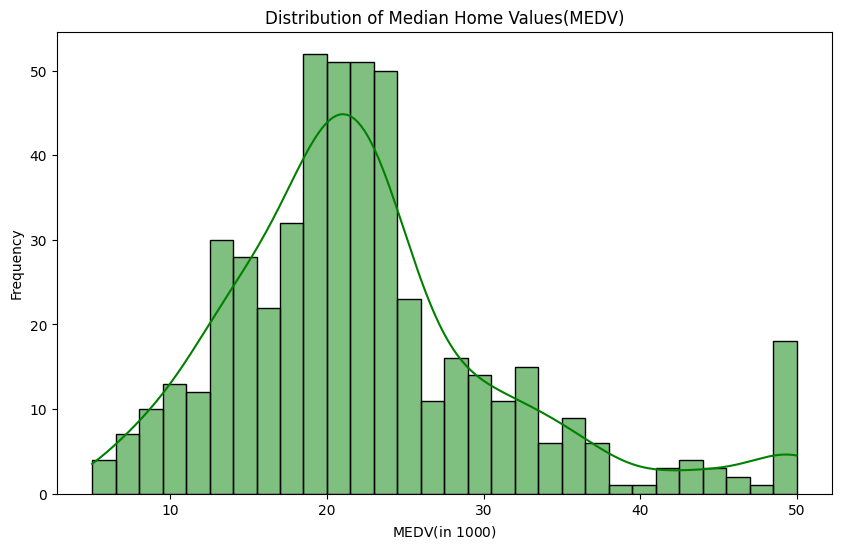

In [55]:
plt.figure(figsize=(10,6))
sns.histplot(df['MEDV'],bins=30,kde=True,color='green')
plt.title('Distribution of Median Home Values(MEDV)')
plt.xlabel('MEDV(in $1000$)')
plt.ylabel('Frequency')

In [56]:
selected_features= ['ZN','INDUS','NOX','RM','TAX','PTRATIO','B','LSTAT']
x=df[selected_features]
y=df['MEDV']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
print('shape of X_train :', x_train.shape)
print('shape of x_test :', x_test.shape)
print('shape of y_train :', y_train.shape)
print('shape of y_test :', y_test.shape)

shape of X_train : (404, 8)
shape of x_test : (102, 8)
shape of y_train : (404,)
shape of y_test : (102,)


In [60]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [61]:
linear_pred=linear_model.predict(x_test)

In [62]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test , linear_pred)
print('Linear Regression Score is :' , lin_r2)

Linear Regression Score is : 0.5868787969239782


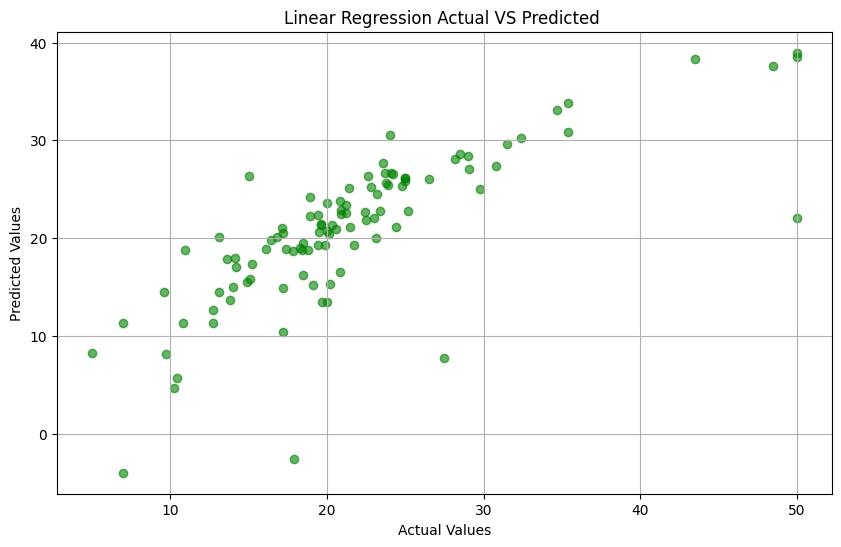

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,linear_pred,color='green' ,alpha=0.6)
plt.title('Linear Regression Actual VS Predicted ')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()